# ECG Anylsis

You'll learn how to load and analyze ECG signals. 

This demo is a jupyter notebook, i.e. intended to be run step by step.

Author: Eric Einspänner
<br>
Contributor: Nastaran Takmilhomayouni

First version: 6th of July 2023 # to be changed


Copyright 2023 Clinic of Neuroradiology, Magdeburg, Germany

License: Apache-2.0

## Table Of Contents
0. [Initial Set-Up for Google Colab](#initial-set-up-for-google-colab)
1. [Initial Set-Up (offline)](#initial-set-up-offline)
2. [File Formats](#File-Formats)
3. [.dat/.hea](#.dat/.hea)
4. [.apn](#.apn)

## Initial Set-Up for Google Colab
<u> Execute these code blocks just in Google Colab! </u>

In [ ]:
!git clone https://github.com/University-Clinic-of-Neuroradiology/python-bootcamp.git

In [ ]:
import os
import sys
from google.colab import output
output.enable_custom_widget_manager()

sys.path.insert(0,'/content/python-bootcamp/notebooks/TimeAnalysis')
os.chdir(sys.path[0])

In [ ]:
%pip install -q ipympl numpy wfdb

In [ ]:
import numpy as np
import wfdb

## Initial Set-Up (offline)

In [1]:
# Make sure figures appears inline and animations works
# Edit this to ""%matplotlib notebook" when using the "classic" jupyter notebook interface
%matplotlib widget

In [2]:
import numpy as np
import wfdb

## --- Start notebook ---

# File Formats
| Signal Type | File Extension       | Origin                                         |
|-------------|----------------------|------------------------------------------------|
| ECG         | .qrs                 | Fractal Image Format                           |  
|             | .xws                 | European data Format                           |
|             | .dat/.hea            | Header( Analyze Software, Mayo Clinic )        |
|             | .apn                 | European data Format                           |

## .dat/.hea

To open ECG file in `.dat/.hea` format, you can use `rdrecord()` function from python `wfdb` module.

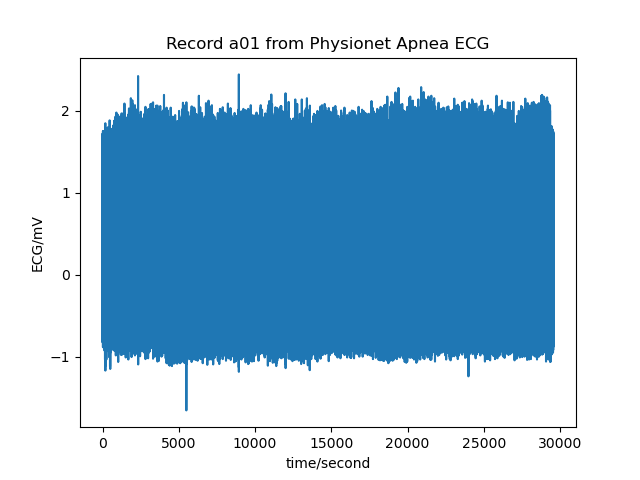

{'record_name': 'a01',
 'n_sig': 1,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 2957000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        ...,
        [ 0.   ],
        [ 0.   ],
        [ 0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a01.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [12],
 'adc_zero': [0],
 'init_value': [-12],
 'checksum': [5827],
 'block_size': [0]}

In [14]:
# open ECG file
record = wfdb.rdrecord('Data/ECG/a01/a01') #in this folder both .hea(header) and .dat(data) should be 
# plot ECG data over time
wfdb.plot_wfdb(record, title='Record a01 from Physionet Apnea ECG') 
# display information of the ECG data stored as a dictionary
display(record.__dict__)

When using `rdrecord()` function you can set the following arguments:
<br>
`sampfrom`          first sample
`sampto`            last  sample
`channels`          which channel
`channel_names`     to print channel names or not


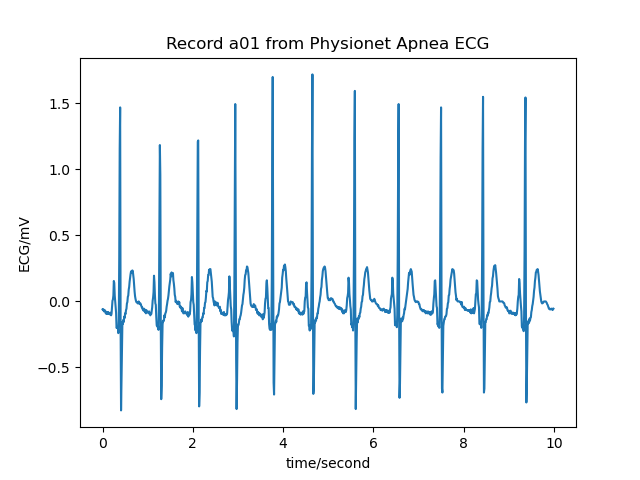

{'record_name': 'a01',
 'n_sig': 1,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        [-0.075],
        [-0.065],
        [-0.07 ],
        [-0.07 ],
        [-0.09 ],
        [-0.08 ],
        [-0.095],
        [-0.08 ],
        [-0.095],
        [-0.08 ],
        [-0.095],
        [-0.085],
        [-0.09 ],
        [-0.09 ],
        [-0.1  ],
        [-0.085],
        [-0.105],
        [-0.09 ],
        [-0.045],
        [ 0.005],
        [ 0.015],
        [ 0.045],
        [ 0.155],
        [ 0.14 ],
        [ 0.045],
        [ 0.005],
        [-0.04 ],
        [-0.085],
        [-0.2  ],
        [-0.195],
        [-0.2  ],
        [-0.2  ],
        [-0.24 ],
        [-0.13 ],
        [ 0.34 ],
        [ 1.155],
        [ 1.47 ],
        [-0.155],
        [-0.825],
        [-0.59 ],
        [-0.35 ],
     

In [33]:
record = wfdb.rdrecord(record_name='Data/ECG/a01/a01', sampfrom=0, sampto=1000,channels=None, physical=True, m2s=True, smooth_frames=True, ignore_skew=False, return_res=16, force_channels=True, channel_names=None, warn_empty=False)

wfdb.plot_wfdb(record, title='Record a01 from Physionet Apnea ECG') 
display(record.__dict__)


## .apn

Each ECG file contains annotations stored during or after the recording in `.apn` file
<br>
To open `.apn` file, you can use `rdann` function (read annotation function) from python `wfdb` module

In [44]:
annotation = wfdb.rdann('Data/ECG/a04/a04', extension="apn") #a01.apn file should be here
print('contained labels in the annotation objects are:',annotation.contained_labels)
print('label fields in the annotation objects are:',annotation.get_label_fields())
print('number of symbols(labels) are', len(annotation.symbol))
print('10 sample symbols(labels) are:',annotation.symbol[30:40])
print('all the symbols(labels) and their counts in the ECG file are', np.unique(annotation.symbol, return_counts=True))

contained labels in the annotation objects are: None
label fields in the annotation objects are: ['symbol']
number of symbols(labels) are 492
10 sample symbols(labels) are: ['N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A']
all the symbols(labels) and their counts in the ECG file are (array(['A', 'N'], dtype='<U1'), array([453,  39], dtype=int64))
